<a href="https://colab.research.google.com/github/benayyad12/ML_SPAM_HAM/blob/main/HAM_OR_SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HAM - SPAM :

### Data acquisition : 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/mail_data.csv')

In [7]:
df.head(20)  # 20 first rows

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Data Pre-processing :

In [8]:
# type of variables : 
df.dtypes

Category    object
Message     object
dtype: object

In [9]:
# informations about dataset : 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
# null values : 
df.isnull().sum()

Category    0
Message     0
dtype: int64

we don't have any null value 

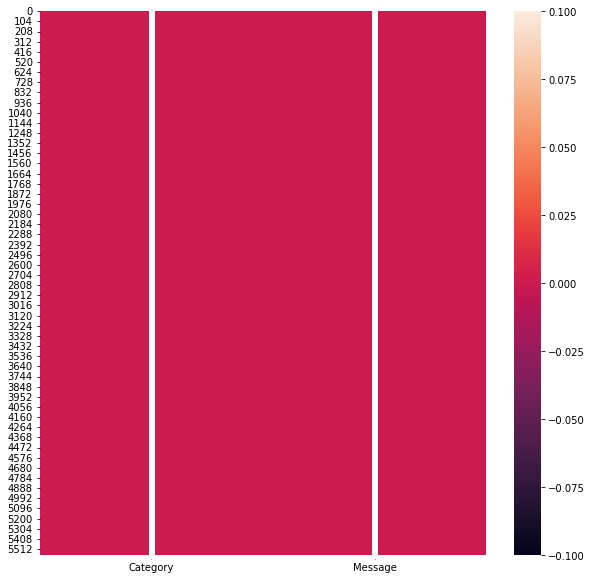

In [12]:
# another way to detect null values : heatmap
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),annot=True)
plt.show()


## Label encoding :

In [18]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Category']=label.fit_transform(df['Category'])

we can also apply a function on column : category 


In [35]:
#def label(x):
#   if x=='spam':
#       x=1
#   else :
#       x=0
#   return x

In [20]:
# spam :  1
# ham  :  0

In [21]:
df.head(10)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [27]:
df['Category'].value_counts()

0    4825
1     747
Name: Category, dtype: int64

In [32]:
d=df[['Category']]==0
d.mean()

Category    0.865937
dtype: float64

In [33]:
d1=df[['Category']]==1
d1.mean()

Category    0.134063
dtype: float64

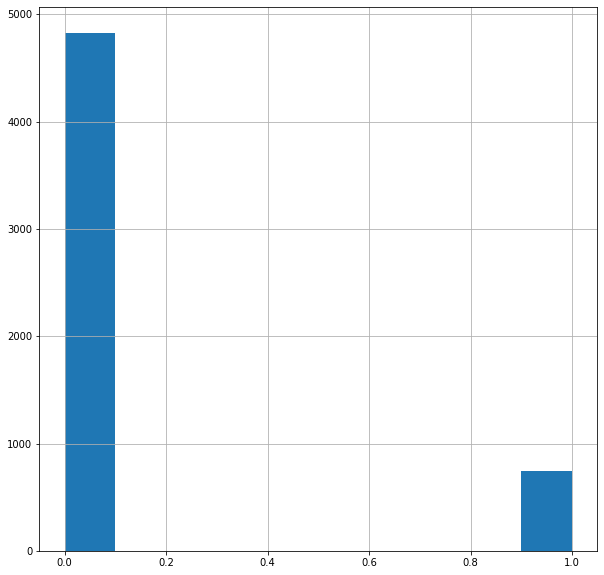

In [34]:
plt.figure(figsize=(10,10))
df['Category'].hist()
plt.show()

# Splitting data :

In [36]:
x=df['Message']
y=df['Category']
print(x)
print()
print()
print(y)


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64


In [37]:
x.shape

(5572,)

In [38]:
y.shape

(5572,)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print('-- Train --')
print(x_train.shape)
print()
print(y_train.shape)
print()
print('--- Test ---')
print(x_test.shape)
print()
print(y_test.shape)


-- Train --
(4457,)

(4457,)

--- Test ---
(1115,)

(1115,)


In [41]:
# change input text to vectors : 
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english')
x_train_vec = feature_extraction.fit_transform(x_train)
x_test_vec  = feature_extraction.fit_transform(x_test)

In [44]:
print(x_train_vec)

  (0, 3422)	0.6418008618863358
  (0, 3960)	0.40459749284424307
  (0, 4776)	0.2937599690543961
  (0, 4486)	0.4933198981059812
  (0, 3101)	0.30778739607068667
  (1, 3855)	0.4410710256765374
  (1, 4574)	0.4410710256765374
  (1, 2534)	0.4410710256765374
  (1, 814)	0.4410710256765374
  (1, 4555)	0.4205367990464199
  (1, 2902)	0.2120712188920981
  (2, 3398)	0.5133141633463273
  (2, 1317)	0.34462014146959175
  (2, 432)	0.4077104256374456
  (2, 4294)	0.36445133334144264
  (2, 2503)	0.5133141633463273
  (2, 4776)	0.2349500626979615
  (3, 1138)	0.6489221209014988
  (3, 1160)	0.44843330753299465
  (3, 3378)	0.38536596088088965
  (3, 3118)	0.3618113574629584
  (3, 3778)	0.31367701143832527
  (4, 3805)	1.0
  (5, 3731)	0.6020708068994186
  (5, 7381)	0.7984426989330436
  :	:
  (4454, 348)	0.2816333253882664
  (4454, 110)	0.3000941484572203
  (4454, 2067)	0.25658354936739225
  (4454, 4488)	0.3000941484572203
  (4454, 651)	0.3000941484572203
  (4454, 373)	0.23959800001827322
  (4454, 796)	0.28163332538

In [45]:
print(x_test_vec)

  (0, 638)	0.14360279230501297
  (0, 2199)	0.13567713432249506
  (0, 204)	0.1694531080959412
  (0, 1973)	0.16375092732327806
  (0, 2876)	0.17680449769475845
  (0, 1577)	0.17680449769475845
  (0, 1354)	0.17680449769475845
  (0, 1315)	0.3536089953895169
  (0, 1862)	0.17680449769475845
  (0, 928)	0.15909190639495832
  (0, 3281)	0.12065691169319241
  (0, 1314)	0.3103055206553057
  (0, 1883)	0.1694531080959412
  (0, 2393)	0.14603833602347793
  (0, 3250)	0.17680449769475845
  (0, 1666)	0.3389062161918824
  (0, 1433)	0.4180017430156821
  (0, 2528)	0.1310181133941753
  (0, 2205)	0.17680449769475845
  (0, 1741)	0.1694531080959412
  (0, 3182)	0.15515276032765285
  (0, 1988)	0.12589020100521284
  (0, 2762)	0.17680449769475845
  (1, 3129)	0.3134597798476714
  (1, 1908)	0.28330164513099554
  :	:
  (1110, 2192)	0.36724630966479727
  (1110, 790)	0.36724630966479727
  (1110, 2626)	0.33249163073349086
  (1110, 770)	0.3469161257653794
  (1110, 1386)	0.33249163073349086
  (1110, 1027)	0.22373440419437882

In [47]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')


In [49]:
# model : 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

# make prediction on train data : 
model.fit(x_train_vec,y_train)

# accuracy score 
y_pred_train = model.predict(x_train_vec)
accuracy_train = accuracy_score(y_train,y_pred_train)
print("The accuracy score on train data is : ",accuracy_train)


The accuracy score on train data is :  0.9679156383217411


In [53]:
# make prediction on test data : 
model.fit(x_test_vec,y_test)
y_pred_test = model.predict(x_test_vec)
accuracy_test = accuracy_score(y_test,y_pred_test)
print("The accuracy score on test data is : ",accuracy_test)

The accuracy score on test data is :  0.9219730941704036


## Knowledge Representation :

In [54]:
def spam_or_ham(msg_text):
    msg_text_vec = feature_extraction.transform(msg_text)
    Result = model.predict(msg_text_vec)
    if Result == 0 :
       print("it's a ham ")
    else :
      print("it's a spam ")
    

In [55]:
spam_or_ham(["URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"])

it's a spam 
